# Importar bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Importar datos

In [2]:
df = pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


# Attribute Information:

- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia,El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- class: >50K, <=50K


# Limpieza


In [3]:
print(f'Cantidad de filas: {df.shape[0]}')
print(f'Cantidad de columnas: {df.shape[1]}')

Cantidad de filas: 48842
Cantidad de columnas: 15


In [4]:
df.isin(['?']).sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

Reemplazar valores nulos de '?' a nan.

In [5]:
df['workclass'] = df['workclass'].replace('?', np.nan)
df['occupation'] = df['occupation'].replace('?', np.nan)
df['native-country'] = df['native-country'].replace('?', np.nan)

# Información del conjunto de datos

In [6]:
info = pd.DataFrame(df.isnull().sum(),columns=["IsNull"])
info.insert(1,"IsNa",df.isna().sum(),True)
info.insert(2,"Duplicate",df.duplicated().sum(),True)
info.insert(3,"Unique",df.nunique(),True)
info.T

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
IsNull,0,2799,0,0,0,0,2809,0,0,0,0,0,0,857,0
IsNa,0,2799,0,0,0,0,2809,0,0,0,0,0,0,857,0
Duplicate,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52
Unique,74,8,28523,16,16,7,14,6,5,2,123,99,96,41,2


- Tenemos 52 filas duplicadas, las cuales debemos eliminar.
- Debemos eliminar las filas que contengan valores nulos.
- La variables `education` y `educational-num` son la misma variable. La diferencia entre las dos es que están categorizadas: `education` con cadena de texto y `educational-num` con números. debemos eliminar la variable `educational-num`.

## Eliminar `educational-num`

In [7]:
df = df.drop(['educational-num'], axis=1)

### Eliminar filas con valores nulos

In [8]:
df = df.dropna()

### Eliminar filas duplicadas

In [9]:
df = df.drop_duplicates()

## Tipos de variables y sus distribuciones

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45175 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45175 non-null  int64 
 1   workclass       45175 non-null  object
 2   fnlwgt          45175 non-null  int64 
 3   education       45175 non-null  object
 4   marital-status  45175 non-null  object
 5   occupation      45175 non-null  object
 6   relationship    45175 non-null  object
 7   race            45175 non-null  object
 8   gender          45175 non-null  object
 9   capital-gain    45175 non-null  int64 
 10  capital-loss    45175 non-null  int64 
 11  hours-per-week  45175 non-null  int64 
 12  native-country  45175 non-null  object
 13  income          45175 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


### Distribuciones variables continuas

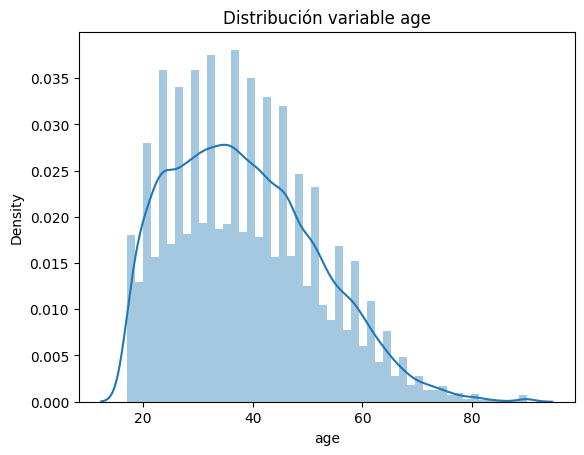

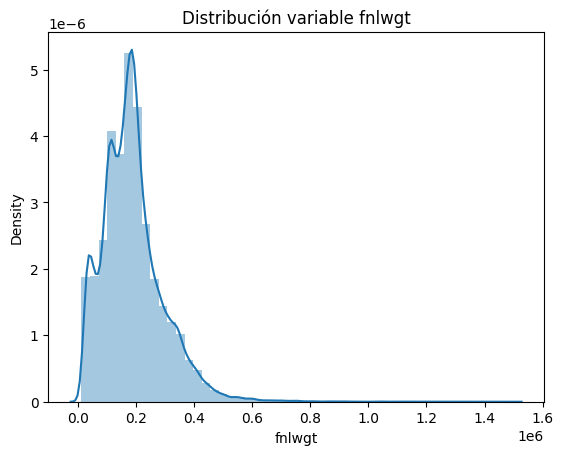

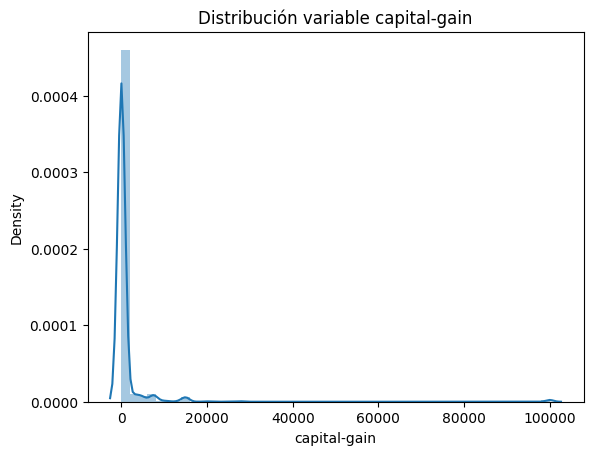

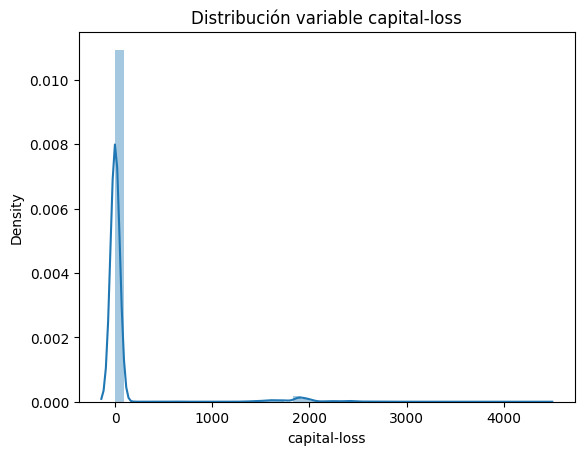

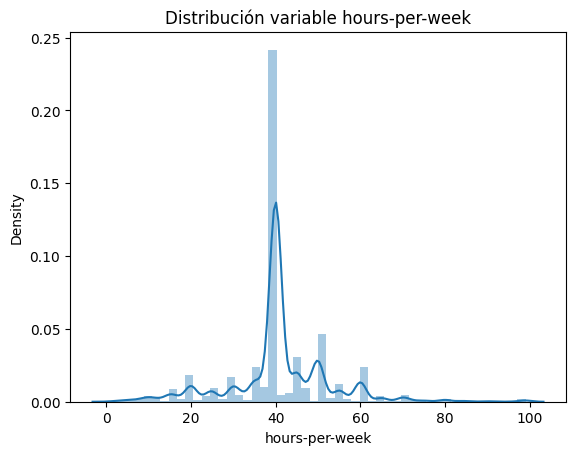

In [11]:
for col in df.select_dtypes(include='int64').columns:
    sns.distplot(df[col])
    plt.title(f'Distribución variable {col}')
    plt.xlabel(col)
    plt.show()

Debemos verificar la distribución de las variables `capital-gain` y `capital-loss` pues tienen concentraciones atípicas.

#### Boxplot de las variables `capital-gain` y `capital-loss`

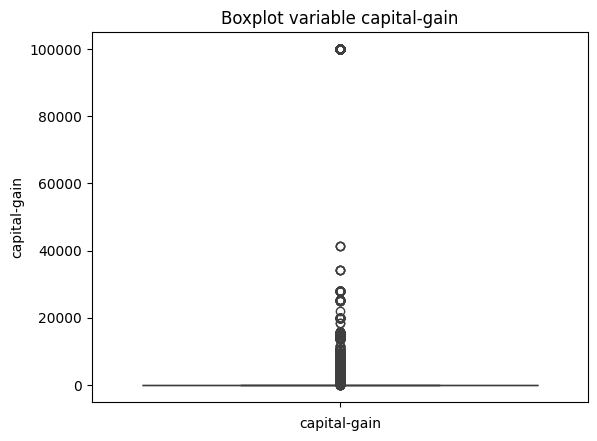

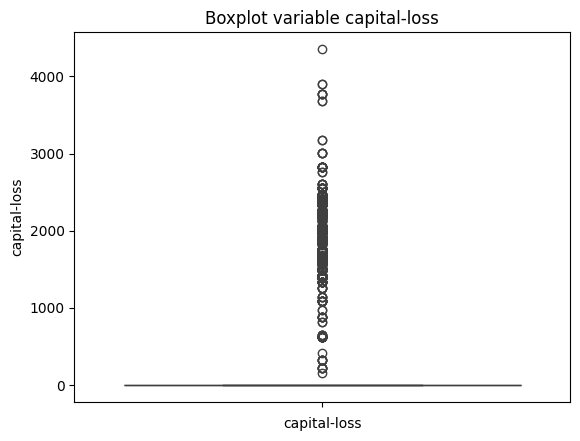

In [12]:
for col in ['capital-gain','capital-loss']:
    sns.boxplot(df[col])
    plt.title(f'Boxplot variable {col}')
    plt.xlabel(col)
    plt.show()

Se deben eliminar estas variables pues tienen demasiados valores atípicos.

In [13]:
df = df.drop(['capital-gain','capital-loss'], axis=1)

## Distribuciones de variables categóricas

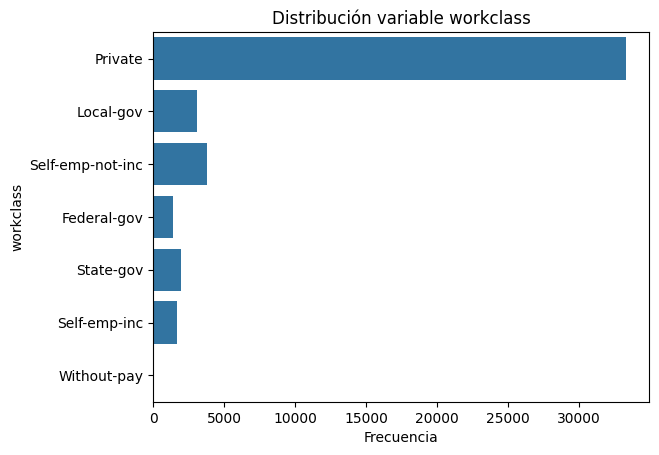

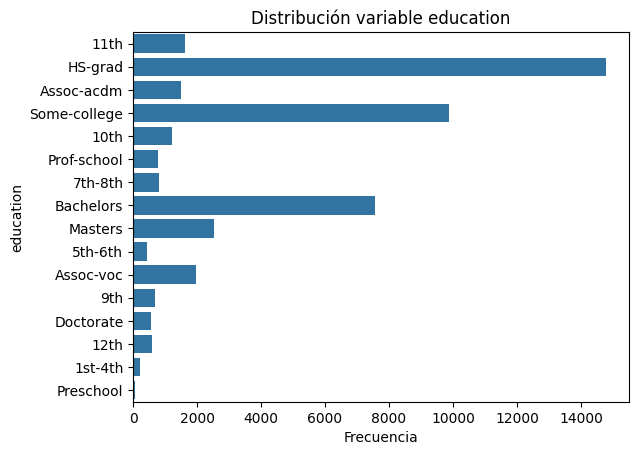

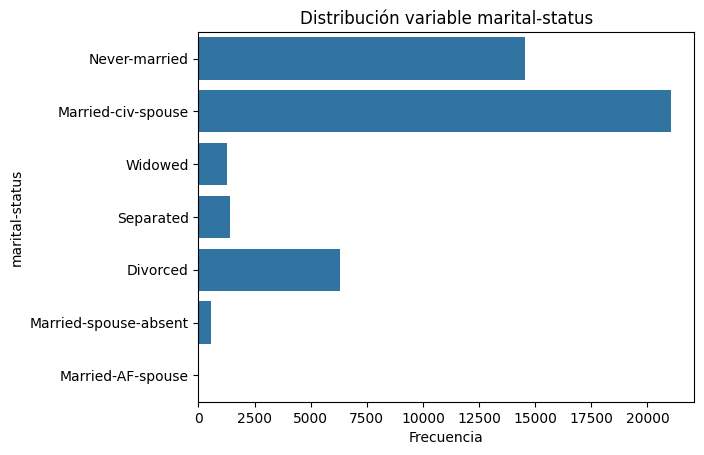

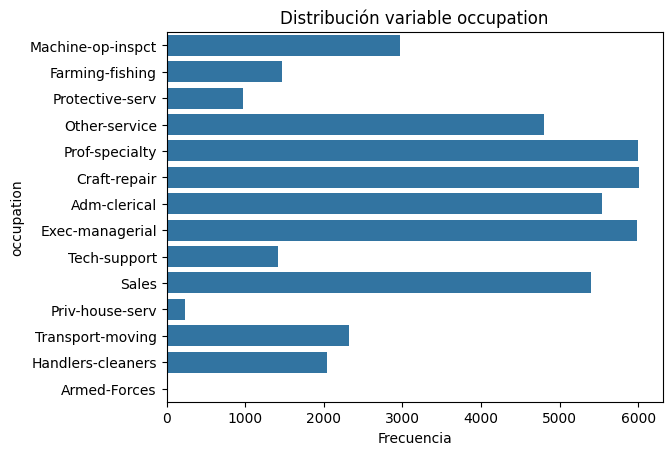

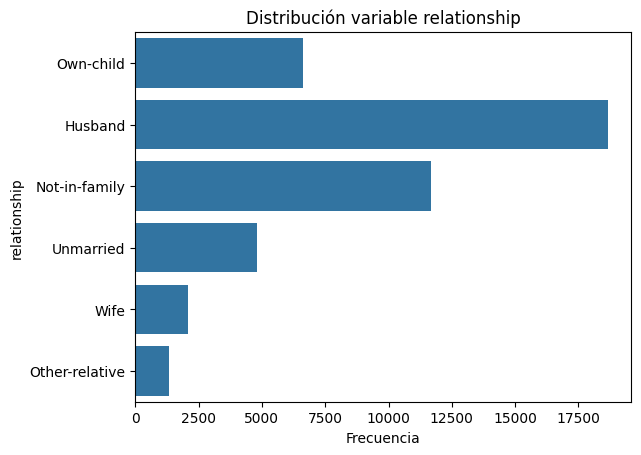

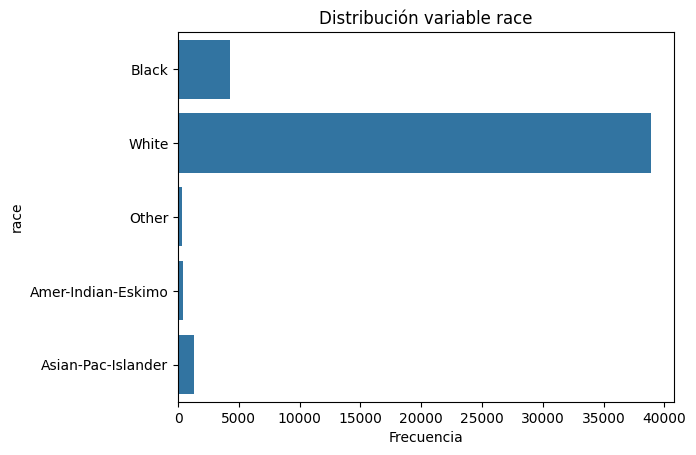

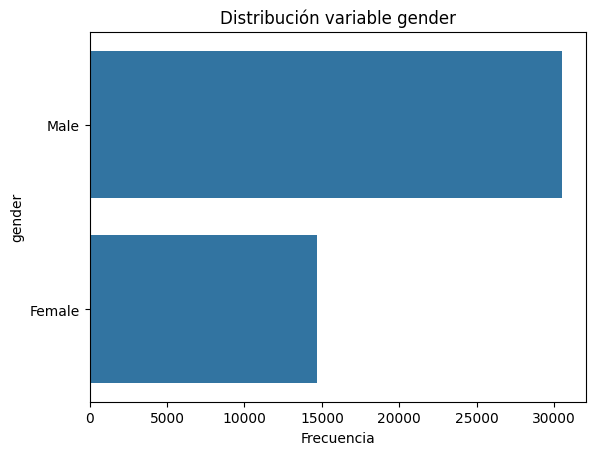

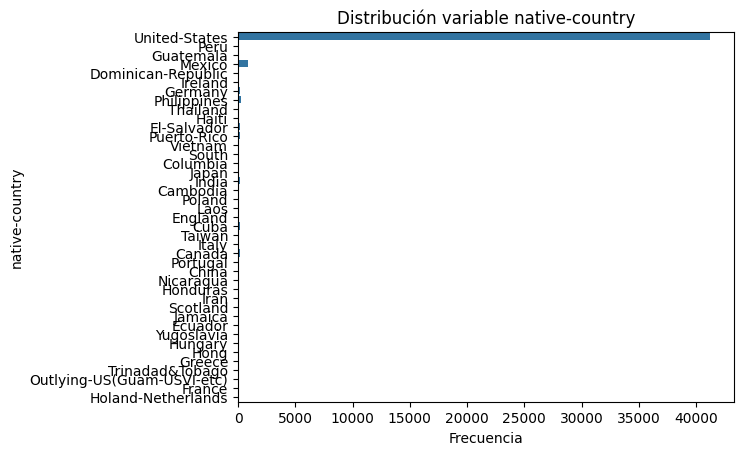

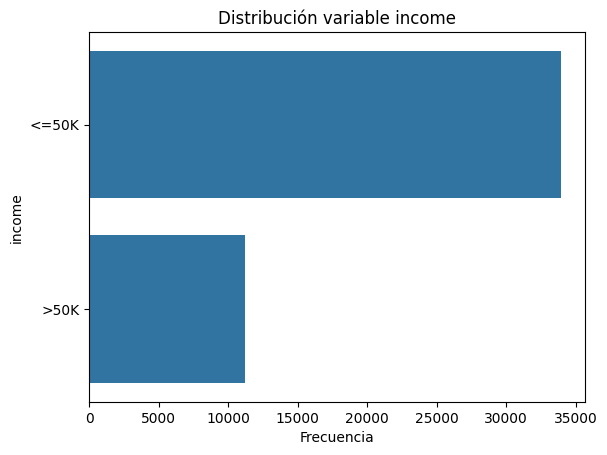

In [14]:
for col in df.select_dtypes(include='object').columns:
    sns.countplot(df[col])
    plt.title(f'Distribución variable {col}')
    plt.xlabel('Frecuencia')
    plt.ylabel(col)
    plt.show()

Se observa en la variable `native-country` una concentración bastante notable en la categoría `United-States`. Se podría tener un sesgo en la clasificación debido a esta variable. Se pueden plantear 2 opciones: La primera, que se tomen para el entrenamiento del modelo solo los registros con origen de USA para solo enfocarlo en aplicantes de este país, y la segunda es mantener esta variable.

Como decisión, se tomará esta variable tal como está.

# Codificar las variables categóricas


Codificamos las variables categóricas sin incluir la variable objetivo que es `income`.

Las variables a codificar son:

In [25]:
[col for col in df.columns if (df[col].dtype=='O') & (col != 'income')]

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native-country']

Las codificamos por medio de una tubería en las que ya le damos este proceso al modelo, en este caso, al modelo KNN

In [54]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier


categorical_features = [col for col in df.columns if (df[col].dtype=='O') & (col != 'income')]

preprocessor = ColumnTransformer(
    transformers=[
        ('cat',
         OneHotEncoder(handle_unknown='ignore'),
         categorical_features
         )
        ],
    remainder='passthrough'
    )

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                     ('knn', KNeighborsClassifier())])



## Conjuntos de entrenamiento y prueba

In [55]:
from sklearn.model_selection import train_test_split

X = df.drop('income', axis=1)
y = df['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41743)

# Busqueda del mejor hiperparámetro de $k$ para el modelo $KNN$

Se buscará el mejor parámetro para el número de vecinos cercanos desde 20 hasta 30. Esto se hace con una validación cruzada con 10 iteraciones con los datos de entrenamiento para cada valor de $k$.

Luego se entrena el modelo.

In [56]:
from sklearn.model_selection import GridSearchCV

param_grid = dict(knn__n_neighbors=list(range(20, 31)))

grid_knn = GridSearchCV(pipeline, param_grid, cv=10, scoring='accuracy', verbose=True)

grid_knn.fit(X_train, y_train,)

Fitting 10 folds for each of 11 candidates, totalling 110 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['workclass',
                                                                          'education',
                                                                          'marital-status',
                                                                          'occupation',
                                                                          'relationship',
                                                                          'race',
                                                                          'gender',
                                                                          'native-country'])])),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29, 30]},
             scoring='accuracy', verbose=True)

Verifiquemos cuál es el mejor $k$ y el valor del accuracy.

In [58]:
print(f'Mejor k: {grid_knn.best_params_}')
print(f'Mejor accuracy: {grid_knn.best_score_}')

Mejor k: {'knn__n_neighbors': 30}
Mejor accuracy: 0.7499446596568898


# Cálculo de accuracy en test

In [63]:
acc = grid_knn.score(X_test,y_test)

print(f'Accuracy: {acc : .3f}')

Accuracy:  0.754


# Creación de un nuevo conjunto de datos para predecir

In [64]:
new_data = pd.DataFrame({
    'age': [30],
    'workclass': ['Private'],
    'fnlwgt': [50000],
    'education': ['HS-grad'],
    'marital-status': ['Married-civ-spouse'],
    'occupation': ['Craft-repair'],
    'relationship': ['Husband'],
    'race': ['White'],
    'gender': ['Male'],
    'hours-per-week': [40],
    'native-country': ['United-States']
})


# Predicción con los nuevos datos

In [66]:
prediction = grid_knn.predict(new_data)
print(f'Predicción: {prediction}')

Predicción: ['<=50K']
